## CuffDiff Summary
### Author: Xiang Li



In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
def Add_common_header(df,common_header):
    name_list=[common_header]*len(df.columns)
    tuples = list(zip(name_list,df.columns))
    df.columns = pd.MultiIndex.from_tuples(tuples)
    return df


def DIR_CHECK_CREATE(Input_Path):
    if (not os.path.isdir(Input_Path)):
        print ("New Dir Made is" + Input_Path)
        os.mkdir(Input_Path)
    else: 
        print ('Dir Exists')

## Generate Excel file contains all genes, and DEGs. 

In [5]:
PATH_FOLDER=os.getcwd()+ '/CuffDiff_Results/'
OUT_FOLDER=os.getcwd()+'/genelist/'

DIR_CHECK_CREATE(PATH_FOLDER)
DIR_CHECK_CREATE(OUT_FOLDER)


INPUT_LIST=os.listdir(PATH_FOLDER)


Dir Exists
Dir Exists
Library:DKO_0h_vs_WT_0h
# of Up:
(647, 13)
# of Down
(705, 13)

Library:DKO_72h_vs_DKO_0h
# of Up:
(1457, 13)
# of Down
(1026, 13)

Library:Ref_DKO_1_2_4n_vs_Ctrl_34n
# of Up:
(1601, 12)
# of Down
(1575, 12)

Library:DKO_72h_vs_WT_72h
# of Up:
(441, 13)
# of Down
(749, 13)

Library:WT_72h_vs_WT_0h
# of Up:
(1812, 13)
# of Down
(1272, 13)

Total Number of DEGs is:5624


### Test output Results

In [25]:
df_all=generate_genes_FPKM_df(INPUT_PATH)
df_down = generate_genes_FPKM_df(INPUT_PATH)
df_down[df_down['gene_id']=='Rnaset2a,Rnaset2b']

,gene_id,WT_0h_0,WT_0h_1,WT_0h_2,WT_72h_0,WT_72h_1,WT_72h_2


#### ALL DEGs Generating

## From above we can continue using:
# "df_ALL_DEGs" for plot

# Plot Part

In [3]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

# Venn 2 and 3D

In [5]:
def Generate_Venn_Diagram(Raw_Path, Out_Path, Merge_Column):
    from matplotlib_venn import venn2
    
    DIR_CHECK_CREATE(Raw_Path)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 2:
        print ('Input Two, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')

        ### Union A and B, use indicator to differentiate them.
        union_A_B=df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer', indicator=True)

        intersection_A_B=union_A_B[union_A_B['_merge']=='both']
        only_A=union_A_B[union_A_B['_merge']=='left_only']
        only_B=union_A_B[union_A_B['_merge']=='right_only']

        #Output
        intersection_A_B.to_csv(OUT_PATH+'/Intersection_'+INPUT_LIST[0][:-4]+'_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        only_A.to_csv(OUT_PATH+'/Only_'+INPUT_LIST[0][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        only_B.to_csv(OUT_PATH+'/Only_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        union_A_B.to_csv(OUT_PATH+'/Union_'+INPUT_LIST[0][:-4]+'_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')


    out = venn2(subsets=(len(only_A[Merge_Column]), len(only_B[Merge_Column]), len(intersection_A_B[Merge_Column])),
          set_labels=(INPUT_LIST[0][:-4], INPUT_LIST[1][:-4] ) )
    for text in out.subset_labels:
        text.set_fontsize(18)
    plt.show()
    
def Generate_Venn3_Diagram(Raw_Path, Out_Path, Merge_Column):
    from matplotlib_venn import venn3, venn3_circles
    
    DIR_CHECK_CREATE(Raw_Path)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 3:
        print ('Input Three, Continue.')
        PATATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]
        PATH_C = RAW_PATH + '/' +INPUT_LIST[2]

        ConA=INPUT_LIST[0][:-4]
        ConB=INPUT_LIST[1][:-4]
        ConC=INPUT_LIST[2][:-4]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')
        df_C = pd.read_csv(PATH_C,sep='\t')

        Merge_Column='gene_id'

        union_A_B_C = df_C.loc[:, [Merge_Column]].merge( df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer'), how='outer')

        intersection_metrix=np.zeros( (len(union_A_B_C),3), dtype=int)


        for j in range(len(union_A_B_C)):
            if (union_A_B_C.loc[j,'gene_id'] in df_A.loc[:,'gene_id']):
                intersection_metrix[j,0] == 1
            if (union_A_B_C.loc[j,'gene_id'] in df_B.loc[:,'gene_id']):
                intersection_metrix[j,1] == 1
            if (union_A_B_C.loc[j,'gene_id'] in df_C.loc[:,'gene_id']):
                intersection_metrix[j,2] == 1

        intersection_metrix = pd.DataFrame(union_A_B_C['gene_id'].isin(df_A['gene_id']))
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConA}),union_A_B_C['gene_id'].isin(df_B['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConB}),union_A_B_C['gene_id'].isin(df_C['gene_id'])], axis=1, join='inner')
        intersection_metrix = intersection_metrix.rename(columns={'gene_id':ConC})

        intersection_metrix = intersection_metrix*1


        intersection_metrix ['ABC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['AB'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]
        intersection_metrix ['AC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]
        intersection_metrix ['BC'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        #intersection_metrix
        ABC = len(intersection_metrix[intersection_metrix['ABC']==3])
        AB = len(intersection_metrix[intersection_metrix['AB']==2])   -ABC
        BC = len(intersection_metrix[(intersection_metrix['BC']==2)]) -ABC
        AC = len(intersection_metrix[(intersection_metrix['AC']==2)]) -ABC

        A_solo = len(df_A) - ABC - AC - AB 
        B_solo = len(df_B) - ABC - BC - AB 
        C_solo = len(df_C) - ABC - AC - BC
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')
        
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8,8))
    out = venn3(subsets = (A_solo, B_solo, AB, C_solo, AC, BC,ABC), \
    set_labels = (ConA, ConB, ConC))
    for text in out.subset_labels:
        text.set_fontsize(18)



In [ ]:
Folder_Name='Down'
RAW_PATH=os.getcwd() + '/genelist/Venn/' + Folder_Name
OUT_PATH=os.getcwd() + '/genelist/Venn/Results_' + Folder_Name

Generate_Venn3_Diagram(RAW_PATH, OUT_PATH, 'gene_id')

Dir Exists
Dir Exists
Input File: 
['up_DKO_0h_vs_WT_0h.bed', 'Up_DKO_CD8_0h_over_WT_CD8_0h_ZZ.bed']
Input Two, Continue.


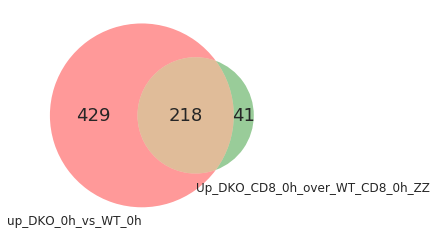

In [14]:
Folder_Name='Up'
RAW_PATH=os.getcwd() + '/Venn_Results_WT_0h_DKO_0h_vs_ZZ_2016/' + Folder_Name
OUT_PATH=os.getcwd() + '/Venn_Results_WT_0h_DKO_0h_vs_ZZ_2016/Results_' + Folder_Name

Generate_Venn_Diagram(RAW_PATH, OUT_PATH, 'gene_id')

In [16]:
len("_20180709000_genelist_RNA_seq_Stim_WT_Up_Tcf1-Dependent")

55

# heatmap

In [4]:
PATH_FOLDER=os.getcwd()+ '/RPKM_All_genes_and_union_peaks/RPKM_All_islandfiltered_read/RPKM_Union_peaks/'
OUT_FOLDER=os.getcwd()+'/Output/'

DIR_CHECK_CREATE(PATH_FOLDER)
#DIR_CHECK_CREATE(OUT_FOLDER)


INPUT_LIST=os.listdir(PATH_FOLDER)
import glob

Merge_Column='gene_id'
union_all   = pd.DataFrame(columns={Merge_Column})
column_name_list = []
for path in glob.glob(PATH_FOLDER+'RPKM*'):
    df_tem = pd.read_csv(path,sep='\t')
    df_tem['gene_id'] = df_tem.index
    union_all = union_all.merge(df_tem, how='outer', on=Merge_Column)
    #col_name_tem = path.replace(PATH_FOLDER,'')[23:-59]
    #col_name_tem = path.replace(PATH_FOLDER,'')[23:-48]
    col_name_tem = path.replace(PATH_FOLDER,'')[23:-32]
    union_all = union_all.rename(columns={"RPKM":col_name_tem})
    #break
union_all = union_all.loc[:,['gene_id','WT-na1','WT-na2','WT-s1','WT-s2','dKO-na1','dKO-na2','dKO-s1','dKO-s2',]].set_index('gene_id')

Dir Exists


In [27]:
union_all

,WT-na1,WT-na2,WT-s1,WT-s2,dKO-na1,dKO-na2,dKO-s1,dKO-s2
gene_id,,,,,,,,
0,12.008232,14.928241,22.619878,13.510805,9.193449,13.383443,14.865762,14.128974
1,36.336599,39.012587,77.375054,31.448727,35.767463,80.995901,29.988939,26.721193
2,35.375976,36.345665,21.071191,27.833931,17.586812,15.361292,15.925161,7.094938
3,5.940378,7.384883,9.243811,7.711949,1.949112,8.985214,5.883180,3.057903
4,6.506786,22.060973,18.651679,19.710307,5.337393,2.589985,16.110337,11.962395
5,29.977694,22.586235,13.639833,31.710800,41.894298,10.606606,41.234791,48.988854
6,59.675876,65.231572,18.428082,29.634378,38.518807,17.133748,25.029230,14.388335
7,34.086312,44.140611,16.284715,34.417998,14.756853,18.090455,12.893722,18.799784
8,60.966309,54.751845,21.399147,32.036097,21.432643,18.200441,15.274522,33.625035


(32956, 8)

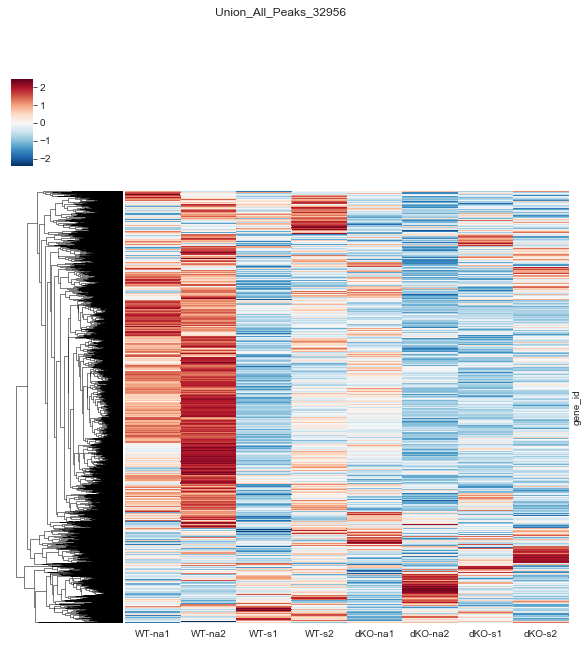

In [8]:
### Drop all zeros rows for plot
df_ALL_DEGs = union_all
Heatmap_Df = df_ALL_DEGs.loc[(df_ALL_DEGs!=0).any(axis=1)]

Heatmap_Name='Union_All_Peaks_'+str(len(Heatmap_Df.index))
#Heatmap_Name='All_Genes_'+str(len(Heatmap_Df.index))
#### Very Important

#Heatmap_Df=FPKM_df.fillna(0)

fig_1 = sns.clustermap(Heatmap_Df,  yticklabels=False, z_score=0, col_cluster=False, cmap='RdBu_r' )
fig_1.savefig(Heatmap_Name+'.png')
fig_1.fig.suptitle(Heatmap_Name)
Heatmap_Df.shape

# PCA



## Input a DataFrame then plot.

In [9]:
# PCA
df_2 = df_ALL_DEGs #.reset_index()

#### Remove unicode of list in python 
df2_gene_id = df_ALL_DEGs.index
#df2_gene_id = [x.encode('ascii', 'ignore') for x in df_2.index]


from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#### In here we set targets as the name of columns, which means our purpose is to compare \
#### the relationship between different columns.
targets= [x.encode('ascii', 'ignore') for x in df_2.columns]

colors=[]
for i in range(len(targets)):
    colors.append( "C"+ str(i))
    #print(colors[i])

################################################################################

df_2_T = df_2.transpose()

# Separating out the features
x = df_2_T.loc[ :, df2_gene_id ].values


# Separating out the target
y = df_2_T.loc[targets,:].values


# Standardizing the featuresbio
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


########### THIS is fucking killing me. reindex df with df2, just using following command.
principalDf.index = df_2_T.index

#finalDf = pd.concat( [principalDf, df_2_T.loc['target']], axis = 1)
principalDf

,principal component 1,principal component 2
WT-na1,134.081882,36.910419
WT-na2,251.104474,-46.135169
WT-s1,-120.145849,-70.914260
WT-s2,9.496083,-83.888505
dKO-na1,0.586859,90.758345
dKO-na2,-135.504833,-43.274028
dKO-s1,-83.552175,17.123532
dKO-s2,-56.066441,99.419666


(32956, 8)

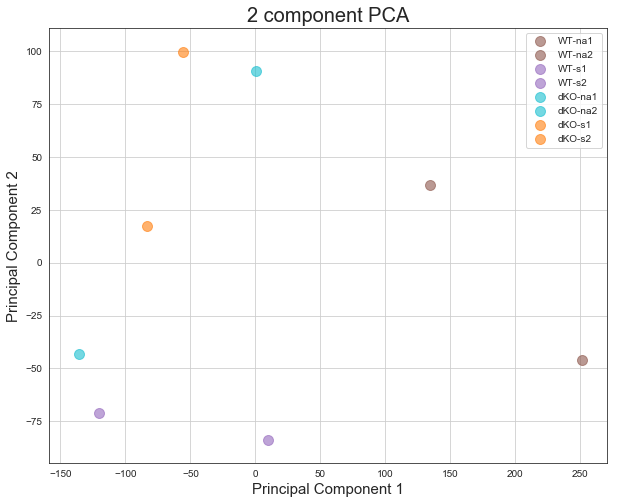

In [10]:
### PLOT

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['C5','C5',
          'C4','C4',
          'C9','C9',
          'C1','C1',
          'C0','C1', 
          'C6','C6','C6',
          'C2','C2','C2',
          'C3','C3','C3']

for target, color in zip( targets,colors):
    indicesToKeep = principalDf.index == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , s = 100, c=color, alpha=0.6)
ax.legend(targets)
#ax.set_xlim(-2,8)
ax.grid()
Parameters_Detail='CD8_HP'
fig.savefig('PCA'+Parameters_Detail+'.png')
df_ALL_DEGs.shape

## Violin Plot

In [11]:
df2 = (df_ALL_DEGs['dKO-na2']+df_ALL_DEGs['dKO-na1'])/2
df3 = (df_ALL_DEGs['dKO-s2']+df_ALL_DEGs['dKO-s1'])/2

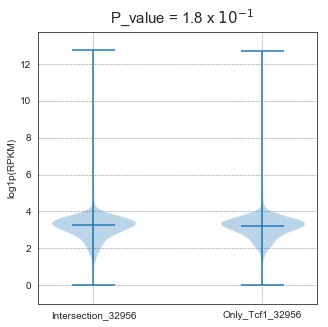

In [20]:
df2 = (df_ALL_DEGs['dKO-na2']+df_ALL_DEGs['dKO-na1'])/2
df3 = (df_ALL_DEGs['dKO-s2']+df_ALL_DEGs['dKO-s1'])/2


all_data=[np.log1p((df3)), np.log1p((df2))]

y_max, y_min = (max( [max(x)  for x in all_data ]), min( [min(x)  for x in all_data ]))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
axes.violinplot( all_data,showmeans=False,showmedians=True)
axes.grid(color='grey', linestyle='dashed', linewidth=0.5)
#axes.set_xlabel('Frequency')
axes.set_ylabel('log1p(RPKM)')
axes.set_ylim(y_min-1,y_max+1)



plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=['Intersection_'+str(len(all_data[0])), 'Only_Tcf1_'+str(len(all_data[1]))])


import re
from scipy import stats
MWU, pvalue = ( stats.mannwhitneyu((df3), (df2), alternative=None )[0],
               stats.mannwhitneyu((df3), (df2), alternative='two-sided')[1])
#print "U= %d p = %.1e" % (MWU, pvalue)

if float("%.1e" % pvalue) == 1.0:
    plt.text(0.1, r'p = 1.0', fontsize=15)
    print('P_value is: %.1e' % pvalue )
else:
    if pvalue !=0:
        sign = '='
        digit, exp = re.search(r'(\S+)e(\S+)' , '%.1e' % pvalue).group(1,2)
        plt.text( 1.1, (y_max+1.5) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)
    else:
        sign, digit, exp = '<', '1.0', '-300'
        print('P_value is: %.1e' % pvalue )
        plt.text( 1.1, (y_max+1.5) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)
        

In [ ]:
df0_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Only_Foxp3_5k.csv', sep='\t', header=0)
df0_a = df0_a.set_index('gene_id').dropna(axis=0, how='any')
df0_a = df0_a.loc[ (df0_a['RPKM'] > 0 ) ]
df0_a = df0_a.rename(columns={'RPKM':'RPKM_WT_Only_Foxp3'})

df0_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Only_Foxp3_5k.csv', sep='\t', header=0)
df0_b = df0_b.set_index('gene_id').dropna(axis=0, how='any')
df0_b = df0_b.loc[ (df0_b['RPKM'] > 0 ) ]
df0_b = df0_b.rename(columns={'RPKM':'RPKM_KO_Only_Foxp3'})

###################################################################################################################
df1_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Intersection_Foxp3_5k_Treg_TCF1.csv', sep='\t', header=0)
df1_a = df1_a.set_index('gene_id').dropna(axis=0, how='any')
df1_a = df1_a.loc[ (df1_a['RPKM'] > 0 ) ]
df1_a = df1_a.rename(columns={'RPKM':'RPKM_WT_Intersection'})

df1_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Intersection_Foxp3_5k_Treg_TCF1.csv', sep='\t', header=0)
df1_b = df1_b.set_index('gene_id').dropna(axis=0, how='any')
df1_b = df1_b.loc[ (df1_b['RPKM'] > 0 ) ]
df1_b = df1_b.rename(columns={'RPKM':'RPKM_KO_Intersection'})

###################################################################################################################
df2_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Only_Treg_TCF1.csv', sep='\t', header=0)
df2_a = df2_a.set_index('gene_id').dropna(axis=0, how='any')
df2_a = df2_a.loc[ (df2_a['RPKM'] > 0 ) ]
df2_a = df2_a.rename(columns={'RPKM':'RPKM_WT_Only_Treg'})

df2_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Only_Treg_TCF1.csv', sep='\t', header=0)
df2_b = df2_b.set_index('gene_id').dropna(axis=0, how='any')
df2_b = df2_b.loc[ (df2_b['RPKM'] > 0 ) ]
df2_b = df2_b.rename(columns={'RPKM':'RPKM_KO_Only_Treg'})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

axes[0,0].violinplot(  (np.log10(df0_a.iloc[:,0])),showmeans=False,showmedians=True )
axes[0,0].set_title('gene_list_WT_Only_FoxP3_'+str(len(df0_a)))

axes[1,0].violinplot( ( np.log10(df0_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,0].set_title('gene_list_KO_Only_FoxP3_'+str(len(df0_b)))



axes[0,1].violinplot( ( np.log10(df1_a.iloc[:,0] )),showmeans=False,showmedians=True)
axes[0,1].set_title('gene_list_WT_Intersection_'+str(len(df1_a)))

axes[1,1].violinplot( ( np.log10(df1_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,1].set_title('gene_list_KO_Intersection_'+str(len(df1_b)))



axes[0,2].violinplot( ( np.log10(df2_a.iloc[:,0] )),showmeans=False,showmedians=True)
axes[0,2].set_title('gene_list_WT_Only_Treg_'+str(len(df2_a)))

axes[1,2].violinplot( ( np.log10(df2_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,2].set_title('gene_list_KO_Only_Treg_'+str(len(df2_b)))



for i in range(2):
    for j in range(3):
        ax=axes[i,j]
        ax.yaxis.grid(True)
        #ax.set_xticks([y + 1 for y in range(max(df1))])
        ax.set_ylim(-0.5,2)
        ax.set_xlabel('Frequency')
        ax.set_ylabel('log10(RPKM)')

fig.savefig('gene_list_WT_KO.png') 

# Scattering Plot + Heatmap

Text(0.5,1,'Tcf1_Dependent : 404 genes')

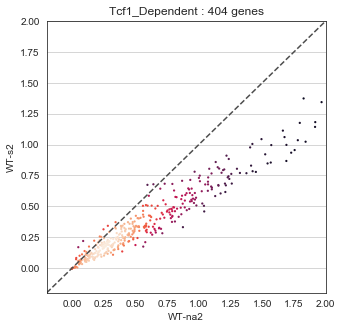

In [27]:
df_ALL_DEGs
range_limit=2

from scipy.stats import gaussian_kde
        # Calculate the point density
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharex=False, sharey=False)
xy = np.vstack([df_ALL_DEGs['WT-na2'], df_ALL_DEGs['WT-s2']])
z = gaussian_kde(xy)(xy)
cax_2 = ax.scatter(df_ALL_DEGs['WT-na2'], df_ALL_DEGs['WT-s2'], alpha=1.0,s=5, c=z,edgecolor='')

#fig.subplots_adjust(right=0.8)
ax.yaxis.grid(True)
ax.set_ylim(-0.1*range_limit,range_limit)
ax.set_xlim(-0.1*range_limit,range_limit)
ax.set_xlabel('WT-na2')
ax.set_ylabel('WT-s2')
ax.plot([-0.1*range_limit,range_limit], [-0.1*range_limit, range_limit], ls="--", c=".3")
ax.set_title('Tcf1_Dependent '+': '+str(len(df_ALL_DEGs))+' genes')

Text(0.5,1,'Union_Peaks : 32956')

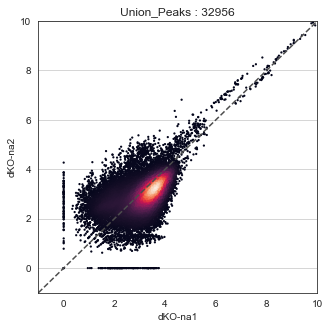

In [137]:
df_ALL_DEGs

df_all_tem = np.log1p(df_ALL_DEGs)

range_limit=10

from scipy.stats import gaussian_kde
        # Calculate the point density
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharex=False, sharey=False)
xy = np.vstack([df_all_tem['dKO-na1'], df_all_tem['dKO-na2']])
z = gaussian_kde(xy)(xy)
cax_2 = ax.scatter(df_all_tem['dKO-na1'], df_all_tem['dKO-na2'], alpha=1.0,s=5, c=z,edgecolor='')

#fig.subplots_adjust(right=0.8)
ax.yaxis.grid(True)
ax.set_ylim(-0.1*range_limit,range_limit)
ax.set_xlim(-0.1*range_limit,range_limit)
ax.set_xlabel('dKO-na1')
ax.set_ylabel('dKO-na2')
ax.plot([-0.1*range_limit,range_limit], [-0.1*range_limit, range_limit], ls="--", c=".3")
ax.set_title('Union_Peaks '+': '+str(len(df_ALL_DEGs)))

Text(0.5,1,'Union_Peaks : 32956')

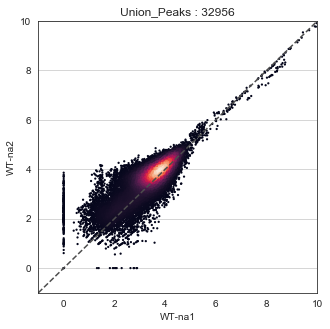

In [143]:
df_ALL_DEGs

df_all_tem = np.log1p(df_ALL_DEGs)

range_limit=10

from scipy.stats import gaussian_kde
        # Calculate the point density
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharex=False, sharey=False)
xy = np.vstack([df_all_tem['WT-na1'], df_all_tem['WT-na2']])
z = gaussian_kde(xy)(xy)
cax_2 = ax.scatter(df_all_tem['WT-na1'], df_all_tem['WT-na2'], alpha=1.0,s=5, c=z,edgecolor='')

#fig.subplots_adjust(right=0.8)
ax.yaxis.grid(True)
ax.set_ylim(-0.1*range_limit,range_limit)
ax.set_xlim(-0.1*range_limit,range_limit)
ax.set_xlabel('WT-na1')
ax.set_ylabel('WT-na2')
ax.plot([-0.1*range_limit,range_limit], [-0.1*range_limit, range_limit], ls="--", c=".3")
ax.set_title('Union_Peaks '+': '+str(len(df_ALL_DEGs)))

Text(0.5,1,'Tcf1_Dependent : 404 genes')

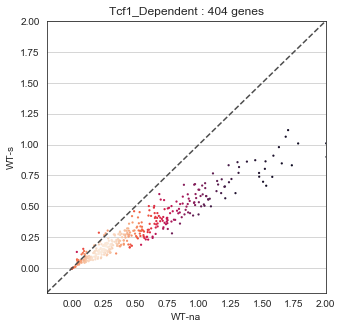

In [28]:
df_ALL_DEGs
range_limit=2

from scipy.stats import gaussian_kde
        # Calculate the point density
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharex=False, sharey=False)
xy = np.vstack([((df_ALL_DEGs['WT-na2']+df_ALL_DEGs['WT-na1'])/2), ((df_ALL_DEGs['WT-s2']+df_ALL_DEGs['WT-s1'])/2)])
z = gaussian_kde(xy)(xy)
ax.scatter((df_ALL_DEGs['WT-na2']+df_ALL_DEGs['WT-na1'])/2, (df_ALL_DEGs['WT-s2']+df_ALL_DEGs['WT-s1'])/2, alpha=1.0,s=5, c=z,edgecolor='')


ax.yaxis.grid(True)
ax.set_ylim(-0.1*range_limit,range_limit)
ax.set_xlim(-0.1*range_limit,range_limit)
ax.set_xlabel('WT-na')
ax.set_ylabel('WT-s')
ax.plot([-0.1*range_limit,range_limit], [-0.1*range_limit, range_limit], ls="--", c=".3")
ax.set_title('Tcf1_Dependent '+': '+str(len(df_ALL_DEGs))+' genes')

#fig.subplots_adjust(right=0.8)




Text(0.5,1,'Tcf1_Dependent : 404 genes')

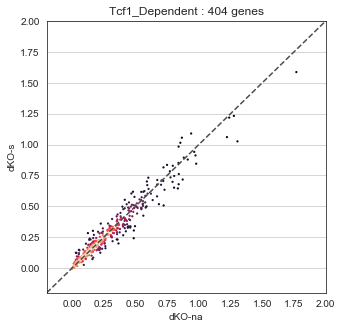

In [30]:
df_ALL_DEGs
range_limit=2

from scipy.stats import gaussian_kde
        # Calculate the point density
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharex=False, sharey=False)
xy = np.vstack([((df_ALL_DEGs['dKO-na2']+df_ALL_DEGs['dKO-na1'])/2), ((df_ALL_DEGs['dKO-s2']+df_ALL_DEGs['dKO-s1'])/2)])
z = gaussian_kde(xy)(xy)
ax.scatter((df_ALL_DEGs['dKO-na2']+df_ALL_DEGs['dKO-na1'])/2, (df_ALL_DEGs['dKO-s2']+df_ALL_DEGs['dKO-s1'])/2, alpha=1.0,s=5, c=z,edgecolor='')


ax.yaxis.grid(True)
ax.set_ylim(-0.1*range_limit,range_limit)
ax.set_xlim(-0.1*range_limit,range_limit)
ax.set_xlabel('dKO-na')
ax.set_ylabel('dKO-s')
ax.plot([-0.1*range_limit,range_limit], [-0.1*range_limit, range_limit], ls="--", c=".3")
ax.set_title('Tcf1_Dependent '+': '+str(len(df_ALL_DEGs))+' genes')

#fig.subplots_adjust(right=0.8)




## Differential Events Calling by Customized Protocol 

In [50]:
PATH_FOLDER=os.getcwd()+ '/RPKM_All_genes_and_union_peaks/RPKM_All_islandfiltered_read/RPKM_Union_peaks/'
OUT_FOLDER=os.getcwd()+'/Output/'

DIR_CHECK_CREATE(PATH_FOLDER)
#DIR_CHECK_CREATE(OUT_FOLDER)


INPUT_LIST=os.listdir(PATH_FOLDER)
import glob

Merge_Column='gene_id'
union_all   = pd.DataFrame(columns={Merge_Column})
column_name_list = []
for path in glob.glob(PATH_FOLDER+'RPKM*'):
    df_tem = pd.read_csv(path,sep='\t')
    df_tem['gene_id'] = df_tem.index
    union_all = union_all.merge(df_tem, how='outer', on=Merge_Column)
    #col_name_tem = path.replace(PATH_FOLDER,'')[23:-59]
    #col_name_tem = path.replace(PATH_FOLDER,'')[23:-48]
    col_name_tem = path.replace(PATH_FOLDER,'')[23:-32]
    union_all = union_all.rename(columns={"RPKM":col_name_tem})
    #break
union_all = union_all.loc[:,['gene_id','WT-na1','WT-na2','WT-s1','WT-s2','dKO-na1','dKO-na2','dKO-s1','dKO-s2',]].set_index('gene_id')

Dir Exists


In [99]:
Fold_Change= 5.0
y_test = union_all['WT-na2'] / union_all['WT-s2']
y_test.describe()

PATH_FOLDER=os.getcwd()+ '/Macs_diff_Dnaseq/Mannual_Diff/'
OUT_FOLDER=os.getcwd()#+'/Output/'

DIR_CHECK_CREATE(PATH_FOLDER)
#DIR_CHECK_CREATE(OUT_FOLDER)
INPUT_LIST=os.listdir(PATH_FOLDER)
INPUT_LIST
print 'Fold Change is '+ str(Fold_Change)
print 'Newly Acquire'
print len(df[y_test< (1.0/Fold_Change)])
print 'Lost Peaks'
print len(df[y_test > (Fold_Change/1.0)])



### find differential events
df = pd.read_csv(PATH_FOLDER+'union_all_peaks.bed', sep='\t',header=None)
df[3] = y_test
df.columns=['#chr','start','end','fc_WT-na2_vs_WT-s2']
df[y_test< (1.0/Fold_Change)].to_csv(PATH_FOLDER+str(len(df[y_test< (1.0/Fold_Change)]))+'_Newly_acquired_peaks_fc_' + str(Fold_Change)+'.bed', sep='\t', index=None, header=True)
df[y_test > (Fold_Change/1.0)].to_csv(PATH_FOLDER+str(len(df[y_test > (Fold_Change/1.0)]))+'_lost_peaks_fc_' + str(Fold_Change)+'.bed', sep='\t',index=None, header=True)




### associated with genes
from pybedtools import BedTool
genes= BedTool(PATH_FOLDER+'gene_Genebody_Up_EX_50k_unique.bed')
df1 = BedTool(PATH_FOLDER+str(len(df[y_test< (1.0/Fold_Change)]))+'_Newly_acquired_peaks_fc_' + str(Fold_Change)+'.bed')
df2 = BedTool(PATH_FOLDER+str(len(df[y_test > (Fold_Change/1.0)]))+'_lost_peaks_fc_' + str(Fold_Change)+'.bed')


(genes+df1).saveas(PATH_FOLDER+'genelist_'+str(len(df[y_test< (1.0/Fold_Change)]))+'_Newly_acquired_peaks_fc_' + str(Fold_Change)+'.bed')
(genes+df2).saveas(PATH_FOLDER+'genelist_'+str(len(df[y_test > (Fold_Change/1.0)]))+'_lost_peaks_fc_' + str(Fold_Change)+'.bed')

Dir Exists
Fold Change is 5.0
Newly Acquire
154
Lost Peaks
260


<BedTool(/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/DNaseq_seq_RNA_Seq/Macs_diff_Dnaseq/Mannual_Diff/genelist_260_lost_peaks_fc_5.0.bed)>

(-0.5, 10.239965438543926)

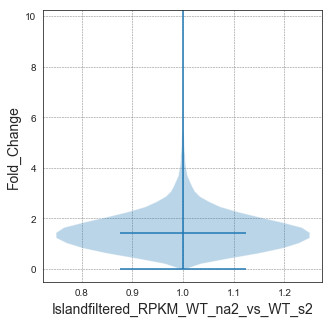

In [133]:
all_data=y_test.replace([np.inf, -np.inf], np.nan).dropna()

y_max = max(all_data)
y_min = min(all_data)
## 2 colunms data
#y_max, y_min = (max( [max(x)  for x in all_data ]), min( [min(x)  for x in all_data ]))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
axes.violinplot( (all_data), showmeans=False,showmedians=True)
axes.grid(color='grey', linestyle='dashed', linewidth=0.5)
axes.set_xlabel('Islandfiltered_RPKM_WT_na2_vs_WT_s2',fontsize=14)
axes.set_ylabel('Fold_Change',fontsize=14)
axes.set_ylim(y_min-0.5, y_max-10)



#plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],xticklabels=['Intersection_'+str(len(all_data)), 'Only_Tcf1_'+str(len(all_data[1]))])



        

In [106]:
y_test.replace([np.inf, -np.inf], np.nan).dropna().describe()

count    32932.000000
mean         1.542919
std          0.885133
min          0.000000
25%          0.979353
50%          1.428223
75%          1.919137
max         20.239965
dtype: float64